In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import cross_val_score
from scipy.stats import norm


In [2]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v3.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head()

,UF,Sexo,Idade,Cor da pele,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,...,Motivo não visita pela depressão,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Idade diagnóstico de depressão,Diagnóstico de alcoolismo,Diagnóstico de depressão
0,11.0,2.0,36.0,1.0,1.0,1.0,2.0,0.0,3.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0
1,11.0,1.0,54.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0
2,11.0,1.0,51.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0
3,11.0,2.0,24.0,4.0,1.0,1.0,2.0,0.0,4.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0
4,11.0,1.0,65.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0


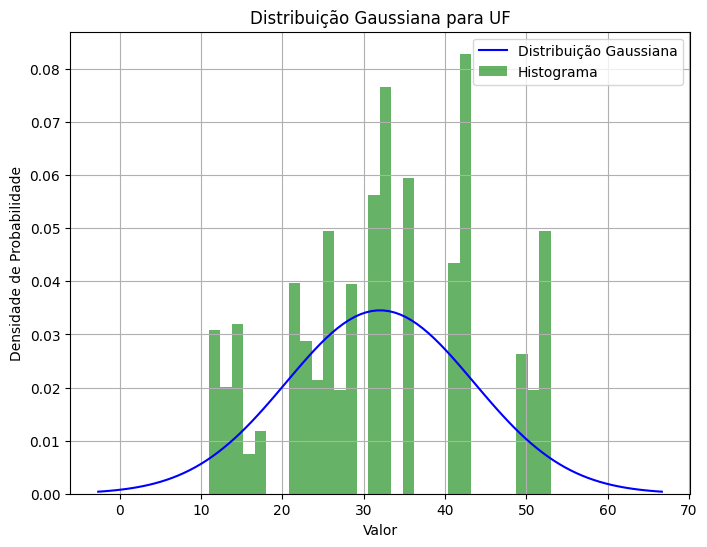

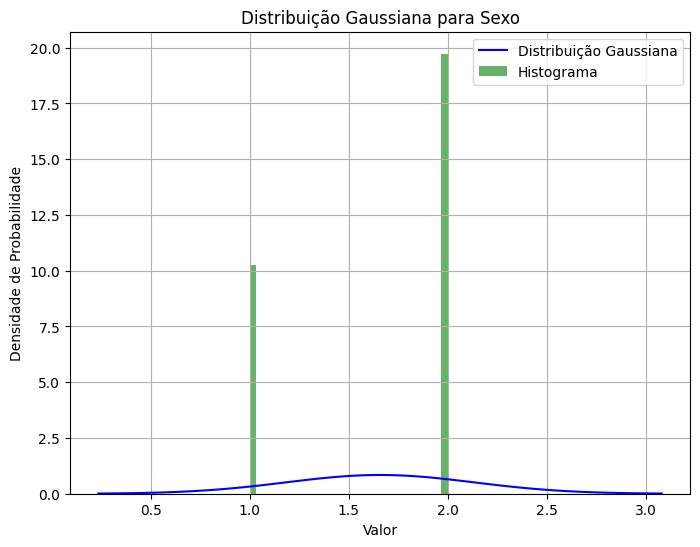

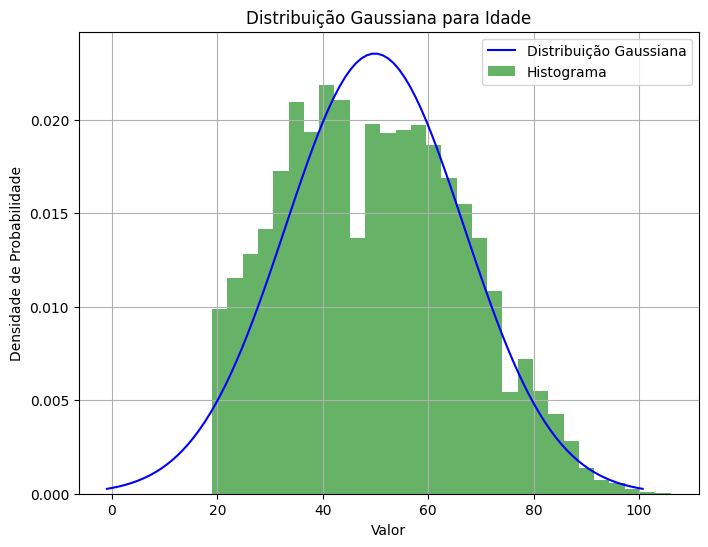

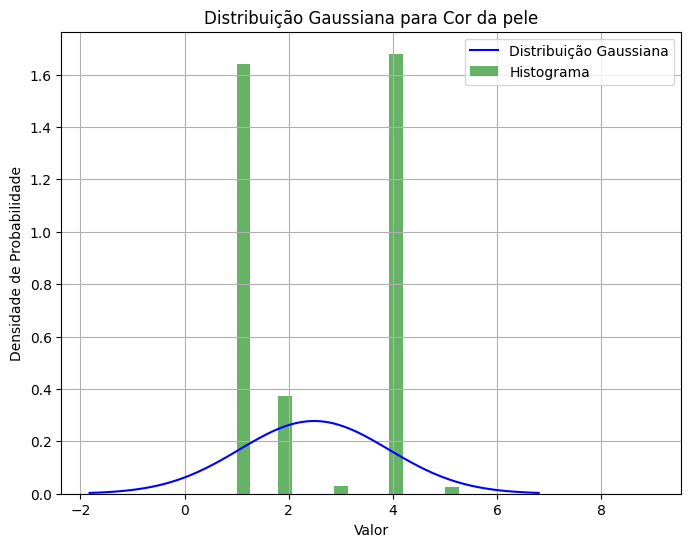

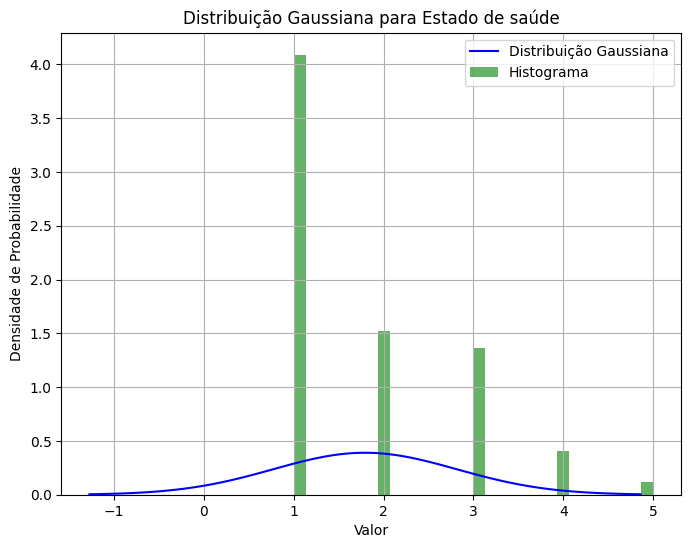

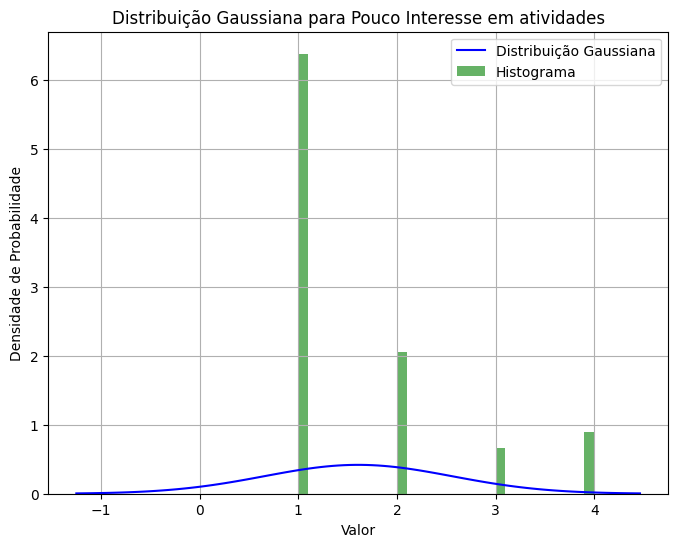

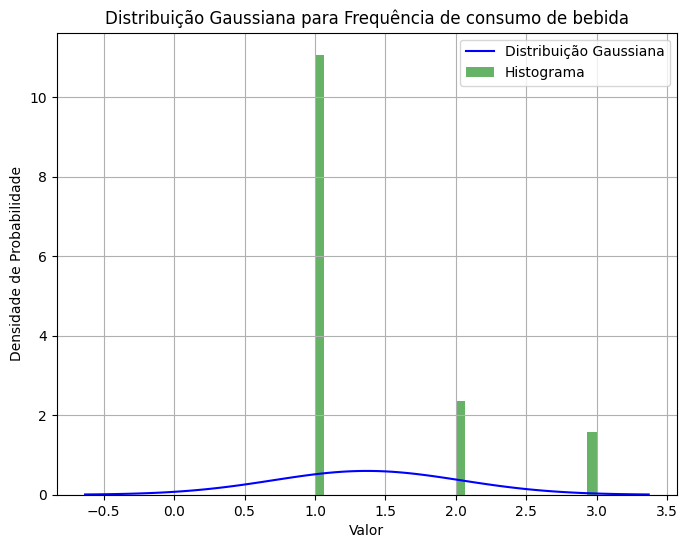

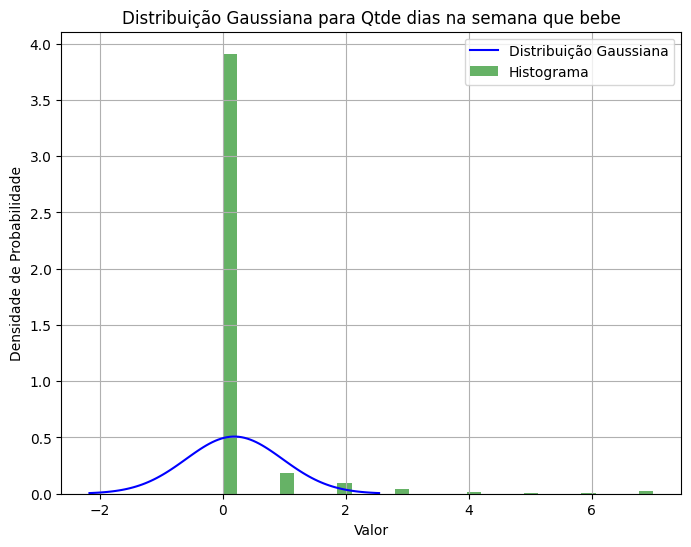

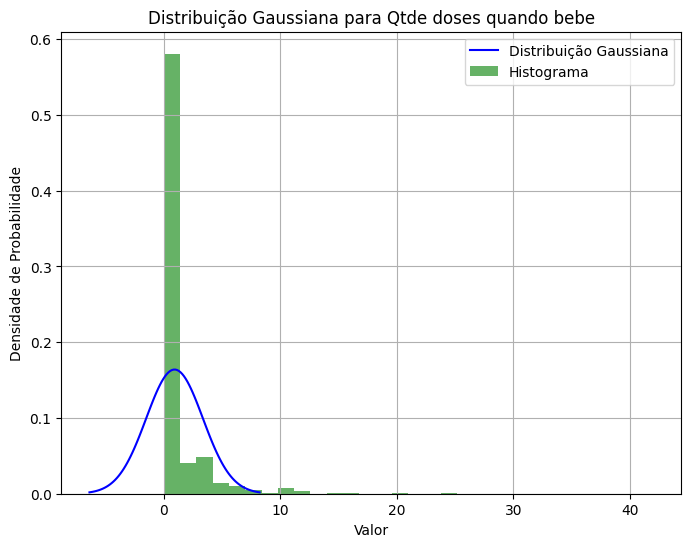

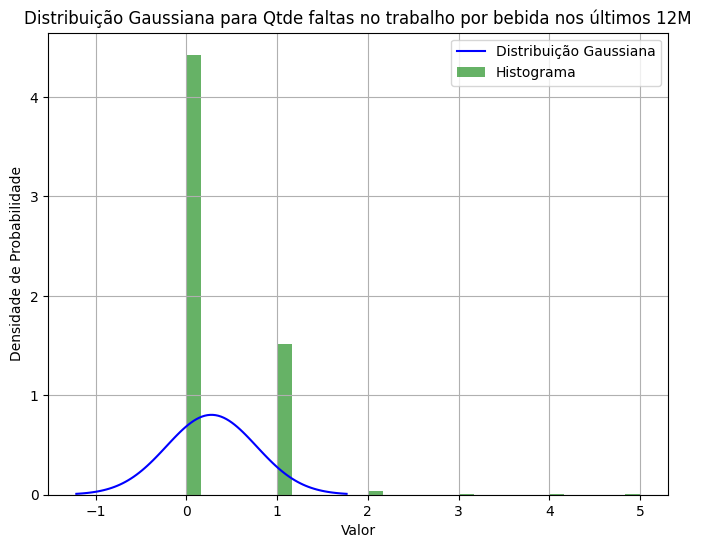

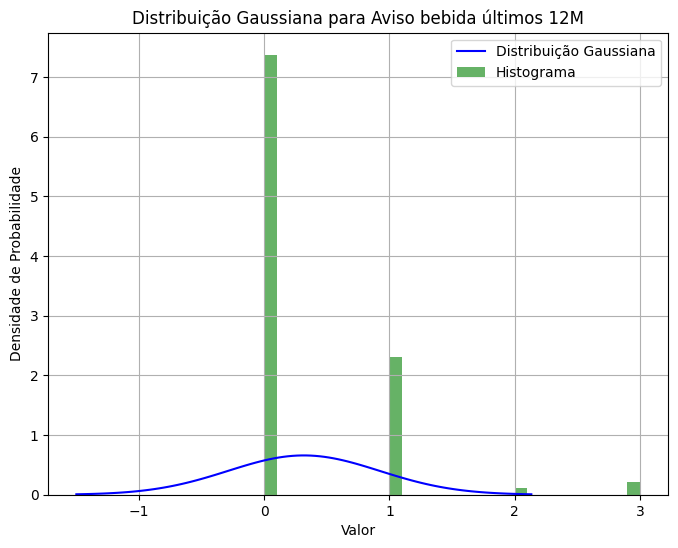

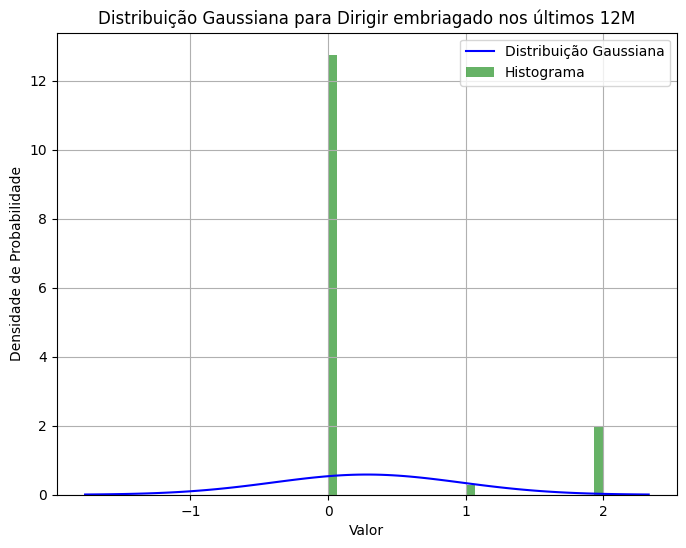

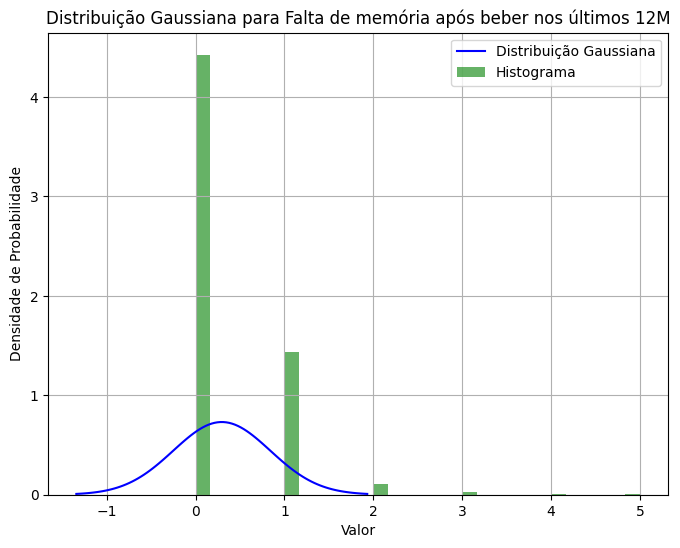

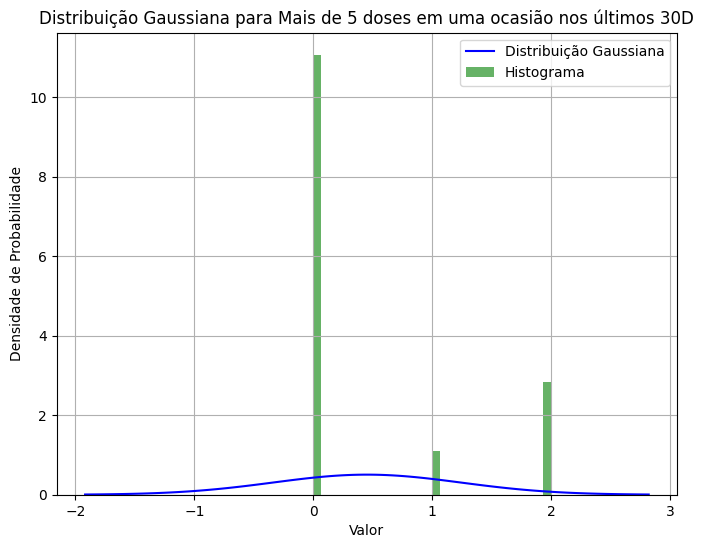

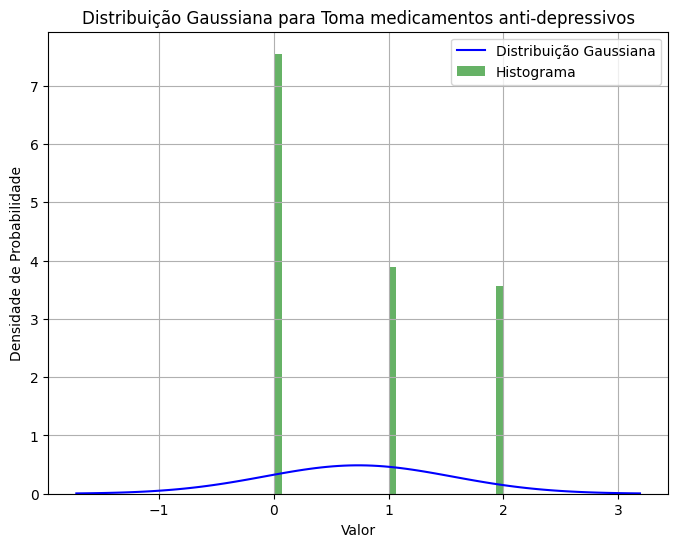

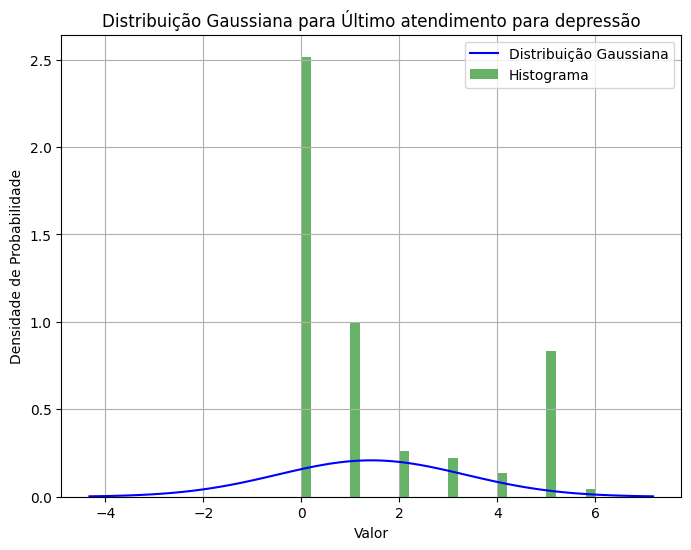

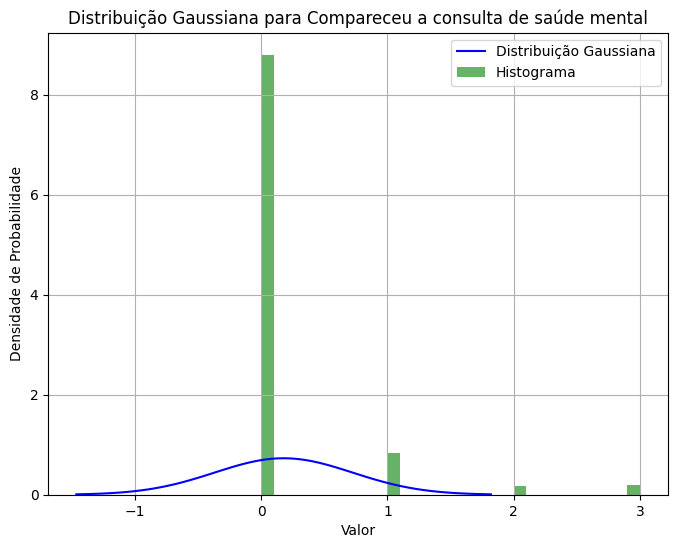

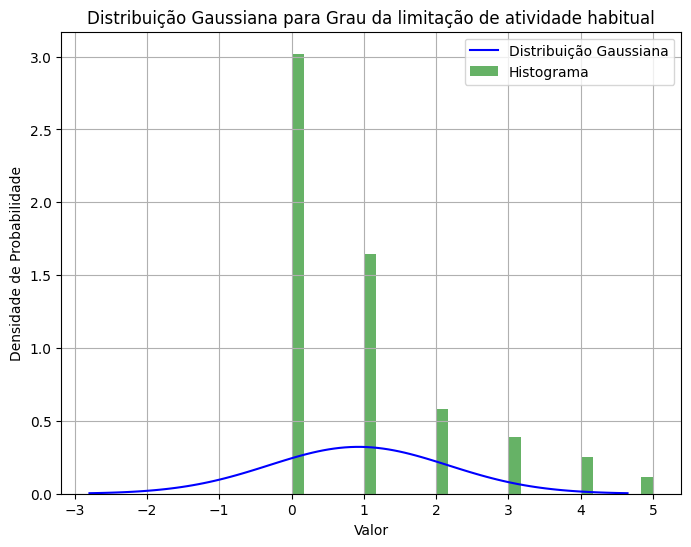

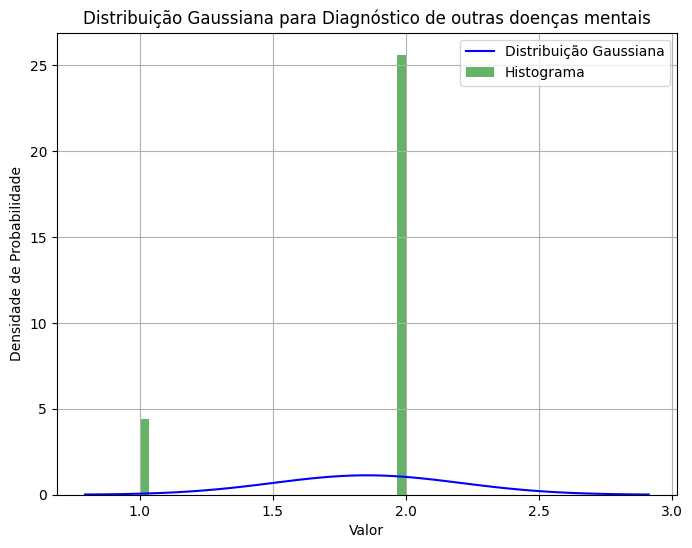

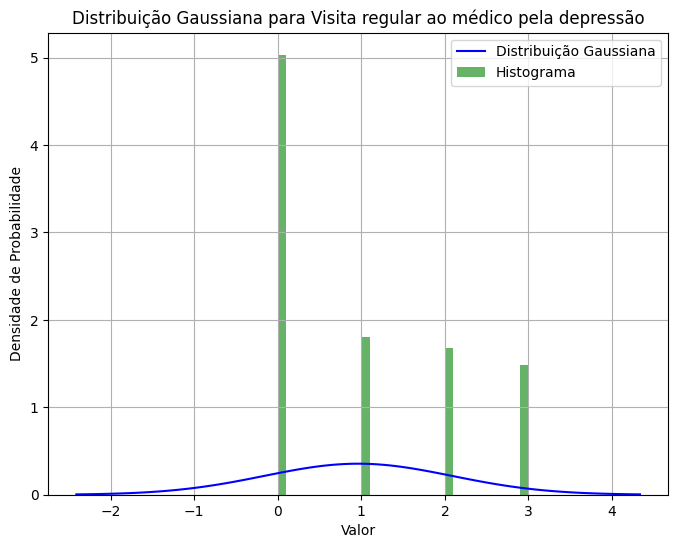

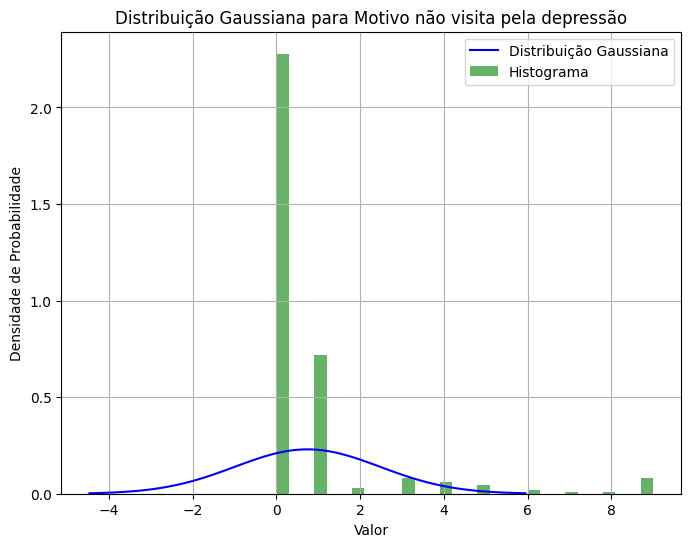

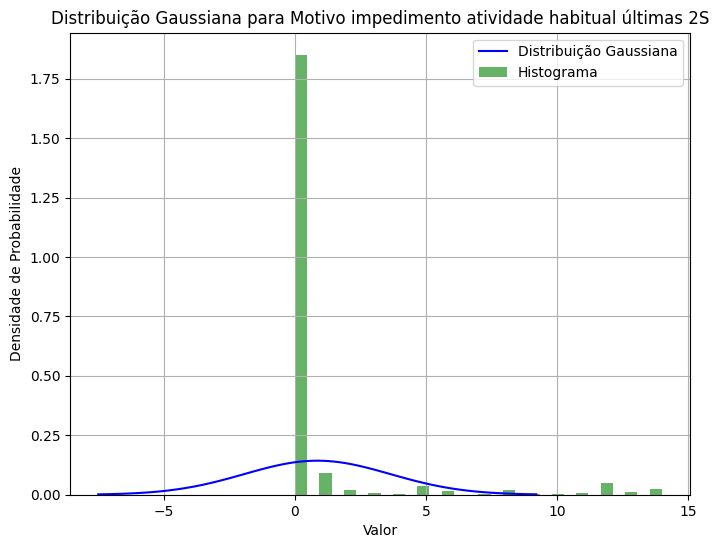

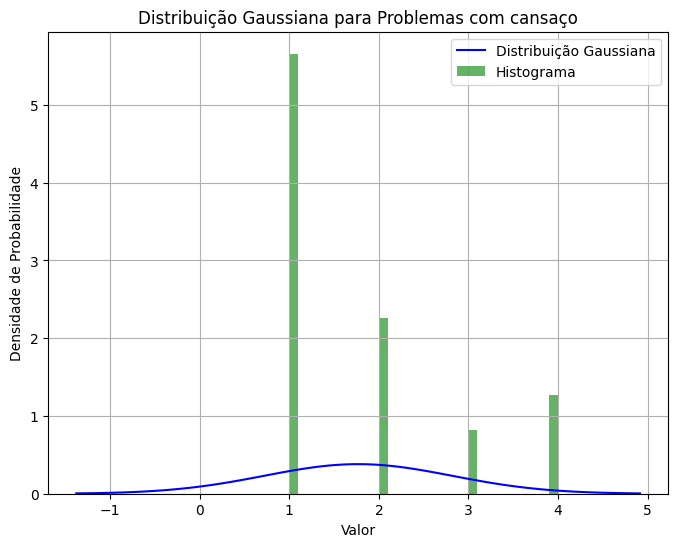

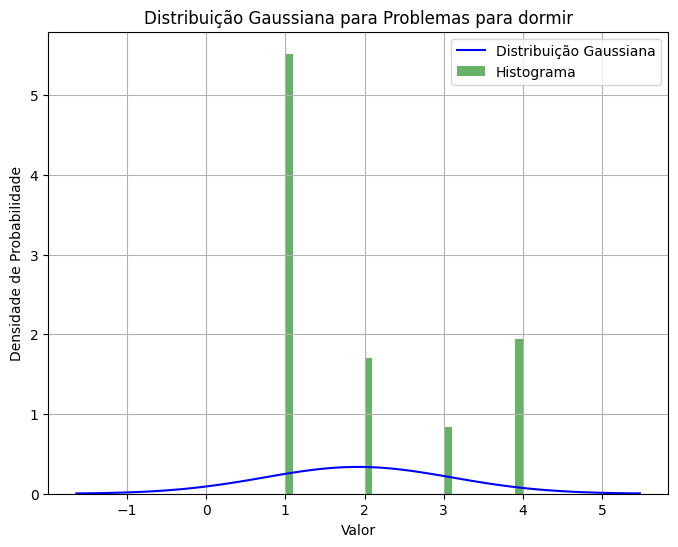

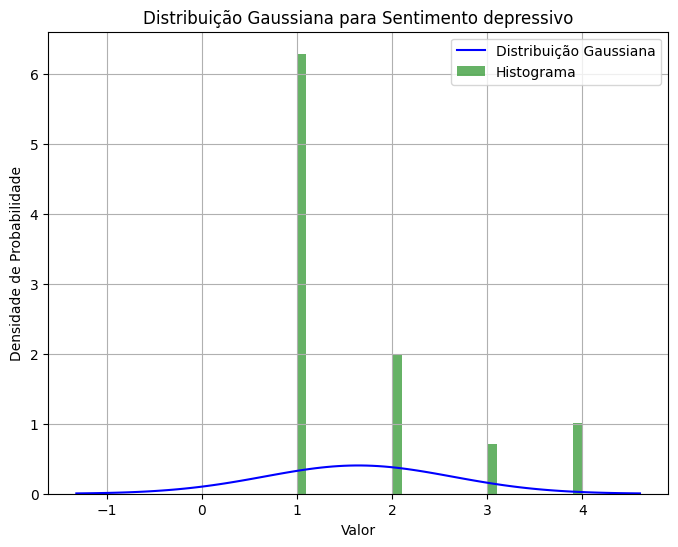

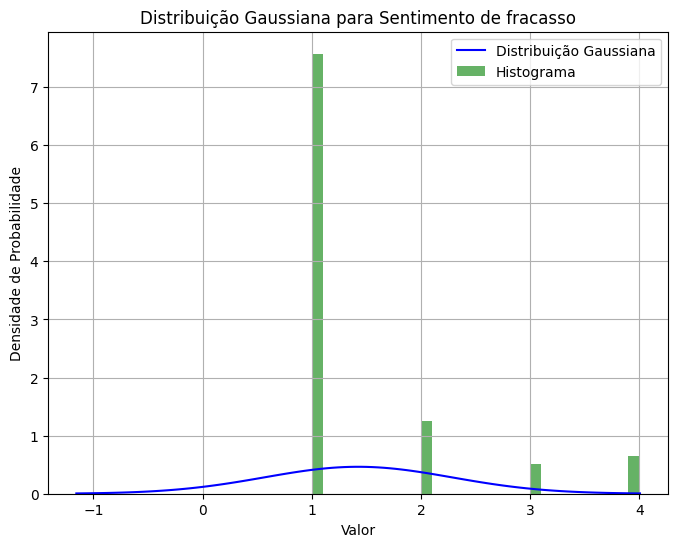

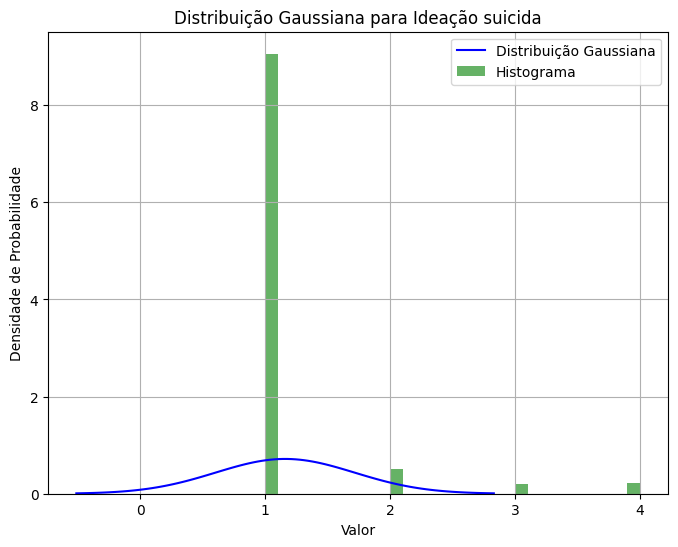

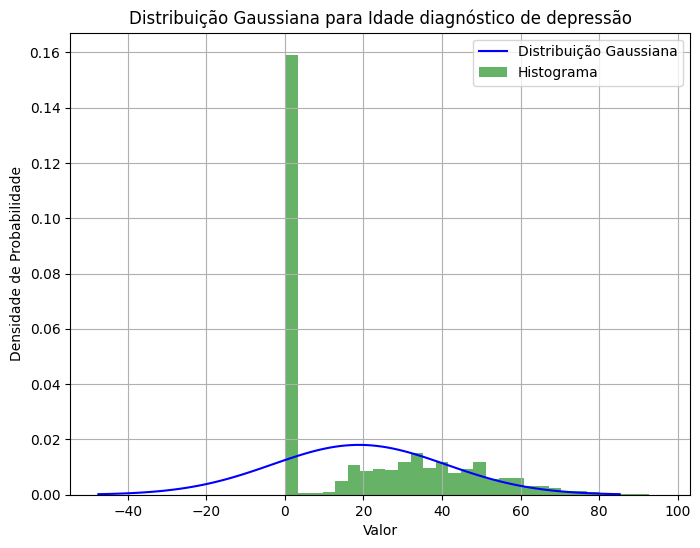

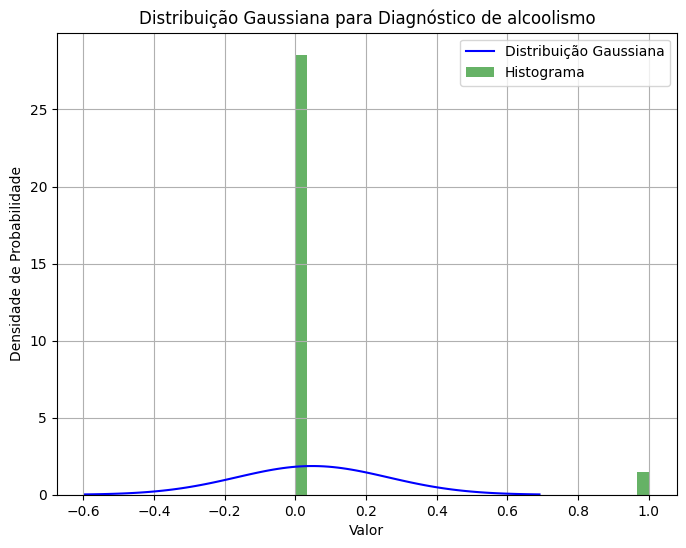

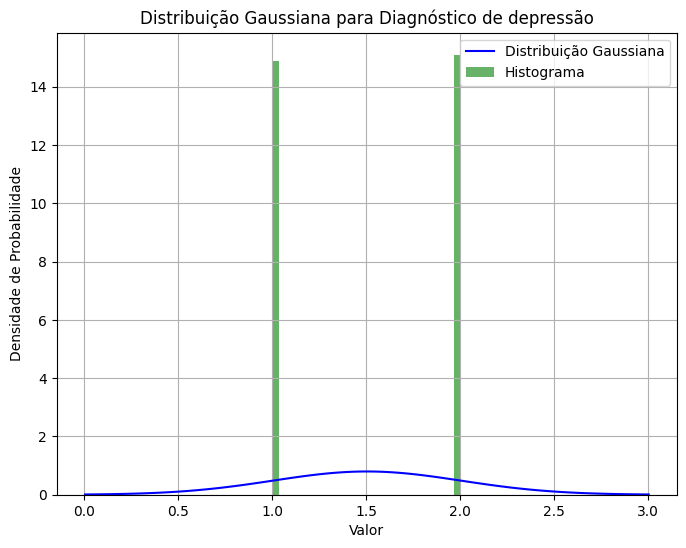

In [3]:

for coluna in df.columns:
    dados = df[coluna]
    
    # Calcular média e desvio padrão dos dados
    media = dados.mean()
    desvio_padrao = dados.std()
    
    # Gerar pontos para o gráfico da distribuição gaussiana
    x = np.linspace(media - 3*desvio_padrao, media + 3*desvio_padrao, 100)
    pdf = norm.pdf(x, loc=media, scale=desvio_padrao)
    
    # Plotar o gráfico
    plt.figure(figsize=(8, 6))
    plt.plot(x, pdf, label='Distribuição Gaussiana', color='blue')
    plt.hist(dados, bins=30, density=True, alpha=0.6, color='green', label='Histograma')
    plt.title(f'Distribuição Gaussiana para {coluna}')
    plt.xlabel('Valor')
    plt.ylabel('Densidade de Probabilidade')
    plt.legend()
    plt.grid(True)
    
    # Mostrar o gráfico
    plt.show()


In [4]:
# Padronização do dataset usando o método z-score (média e desvio padrão, valores entre -1 e 1)

defaut_df = (df - df.mean()) / df.std()
defaut_df

,UF,Sexo,Idade,Cor da pele,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,...,Motivo não visita pela depressão,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Idade diagnóstico de depressão,Diagnóstico de alcoolismo,Diagnóstico de depressão
0,-1.820040,0.721360,-0.818803,-1.035448,-0.775740,-0.636859,0.947754,-0.239913,0.848342,1.455807,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,-0.225087,0.993316
1,-1.820040,-1.386187,0.243693,-1.035448,-0.775740,-0.636859,-0.552342,-0.239913,-0.384310,-0.558596,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,-0.225087,0.993316
2,-1.820040,-1.386187,0.066610,-1.035448,-0.775740,-0.636859,0.947754,-0.239913,0.437458,1.455807,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,-0.225087,0.993316
3,-1.820040,0.721360,-1.527133,1.052122,-0.775740,-0.636859,0.947754,-0.239913,1.259226,1.455807,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,-0.225087,0.993316
4,-1.820040,-1.386187,0.892995,1.052122,-0.775740,-0.636859,-0.552342,-0.239913,-0.384310,-0.558596,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,-0.225087,0.993316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,1.815839,0.721360,0.125638,-1.035448,0.202448,-0.636859,-0.552342,-0.239913,-0.384310,-0.558596,...,0.149584,-0.306041,-0.732802,0.067725,0.361303,0.668078,1.509260,1.181264,-0.225087,-1.006669
16772,1.815839,0.721360,1.837435,-1.035448,0.202448,-0.636859,-0.552342,-0.239913,-0.384310,-0.558596,...,0.149584,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,0.819683,-0.225087,-1.006669
16773,1.815839,-1.386187,0.184665,0.356266,1.180637,0.413264,2.447850,-0.239913,0.848342,1.455807,...,1.877444,0.052814,0.220847,0.067725,0.361303,-0.494182,-0.286184,0.232115,-0.225087,-1.006669
16774,1.815839,0.721360,0.302720,-1.035448,1.180637,1.463387,2.447850,1.033751,2.491879,1.455807,...,0.725538,0.052814,2.128144,1.754666,2.386771,-0.494182,-0.286184,0.729288,4.442470,-1.006669


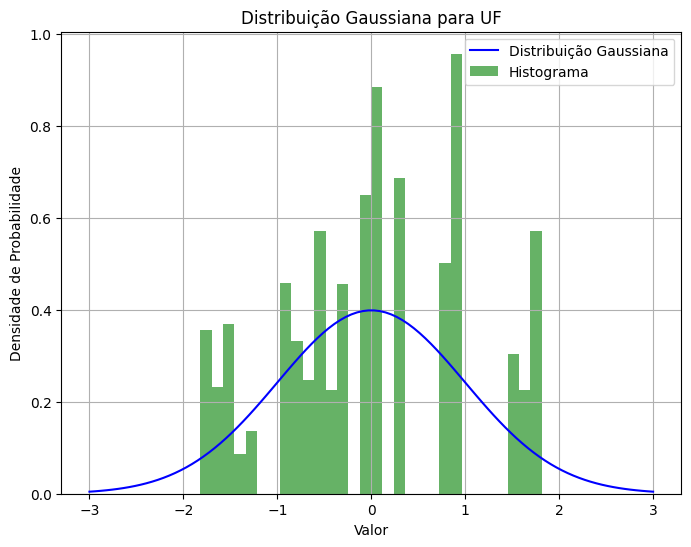

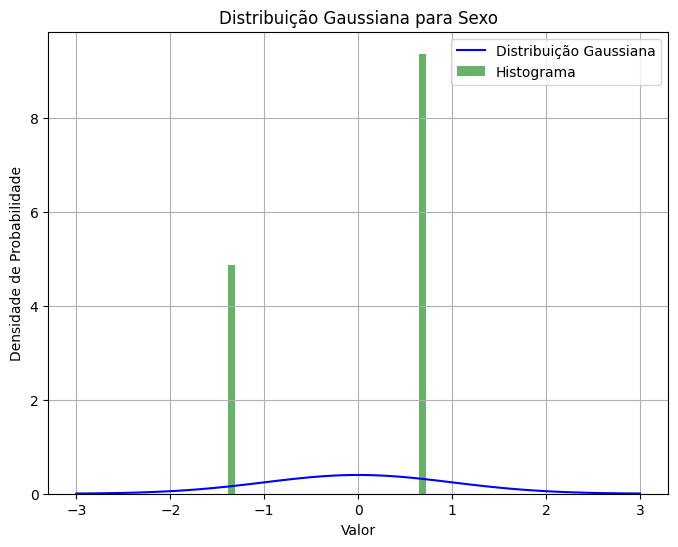

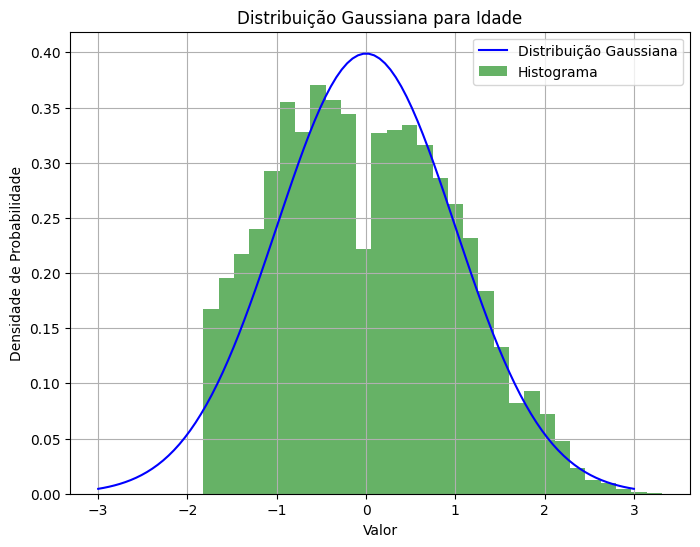

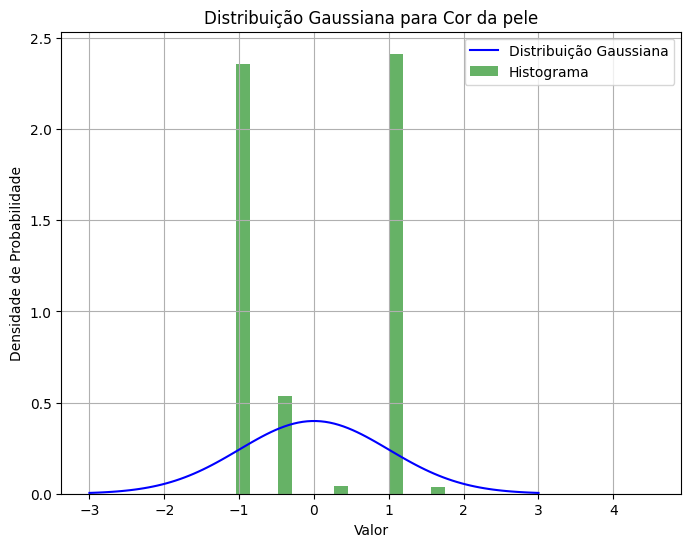

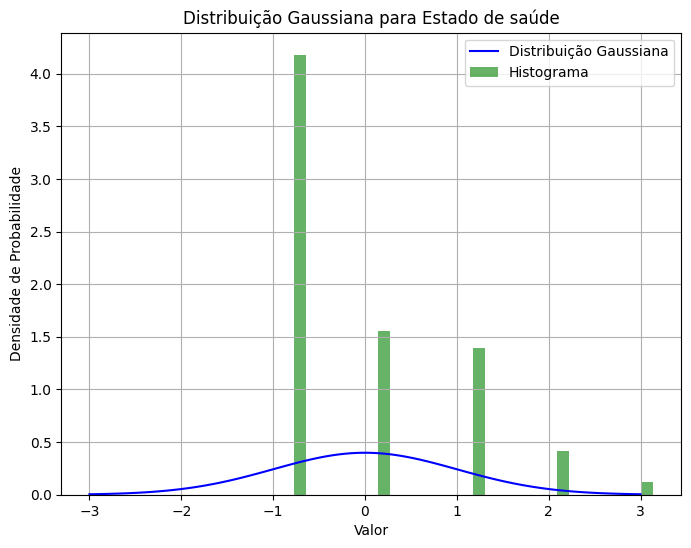

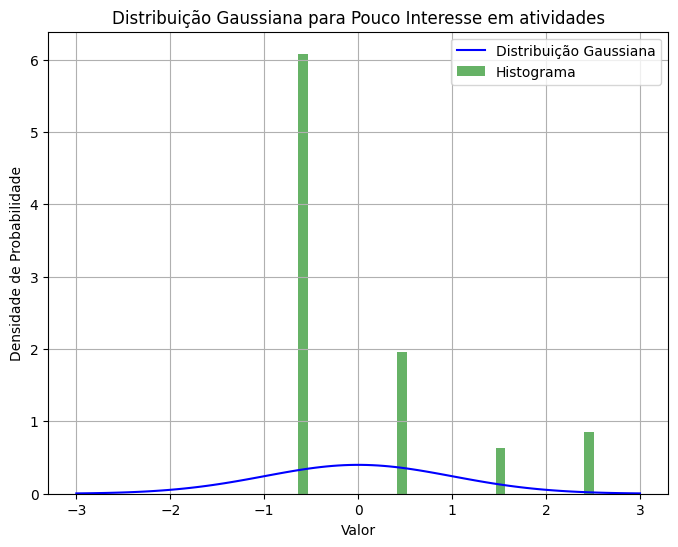

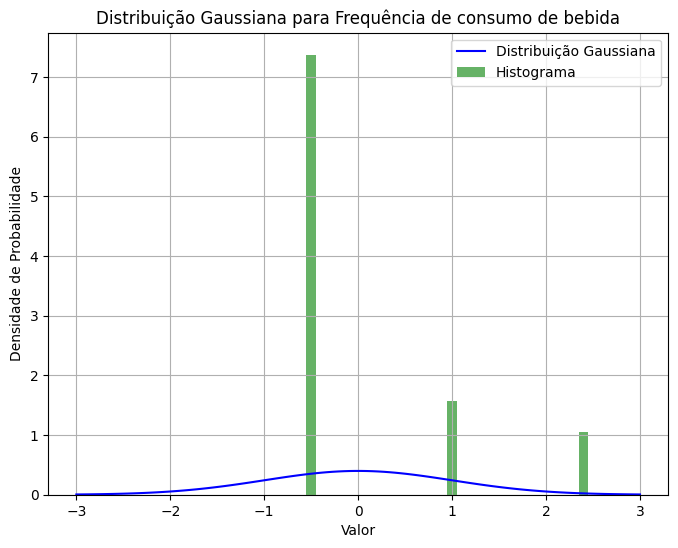

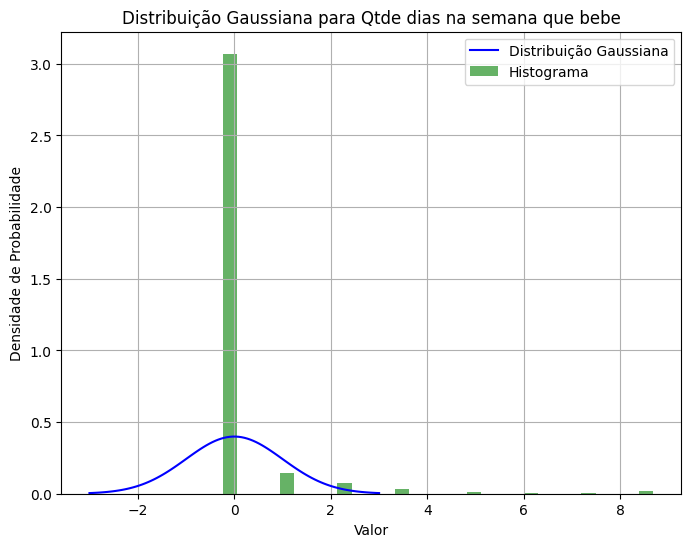

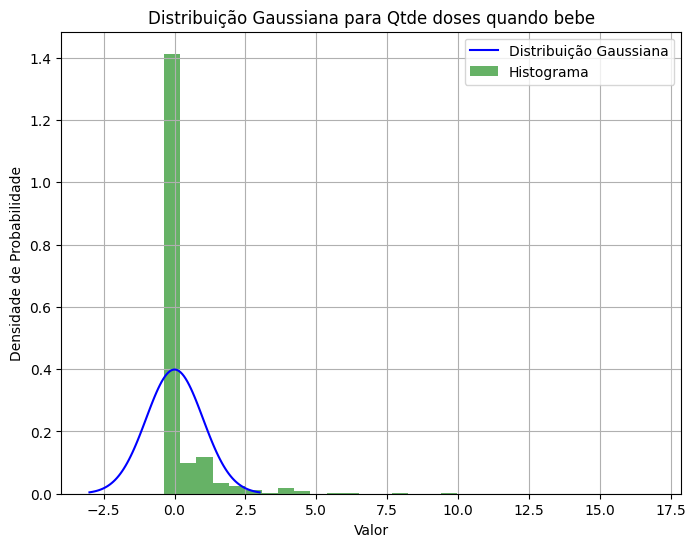

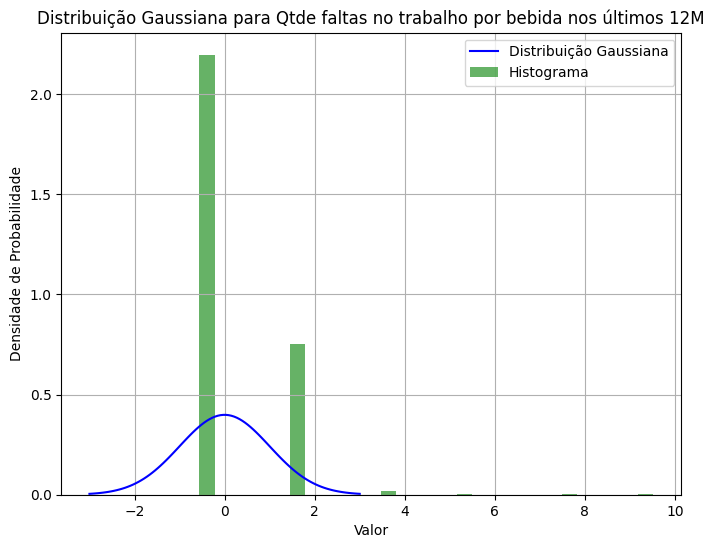

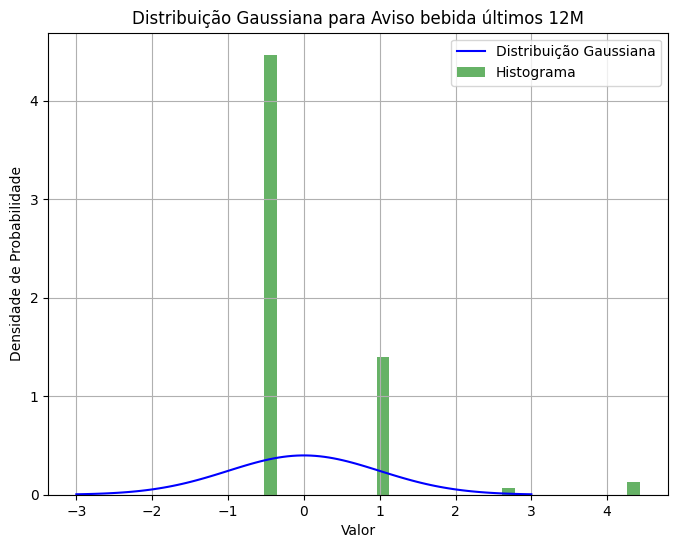

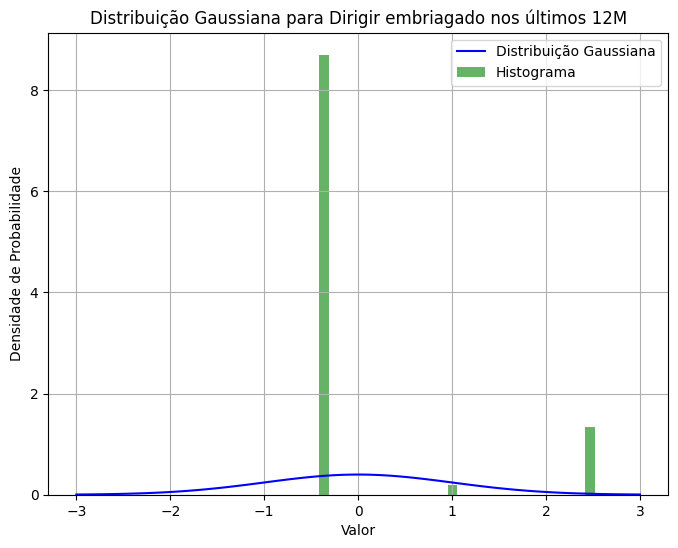

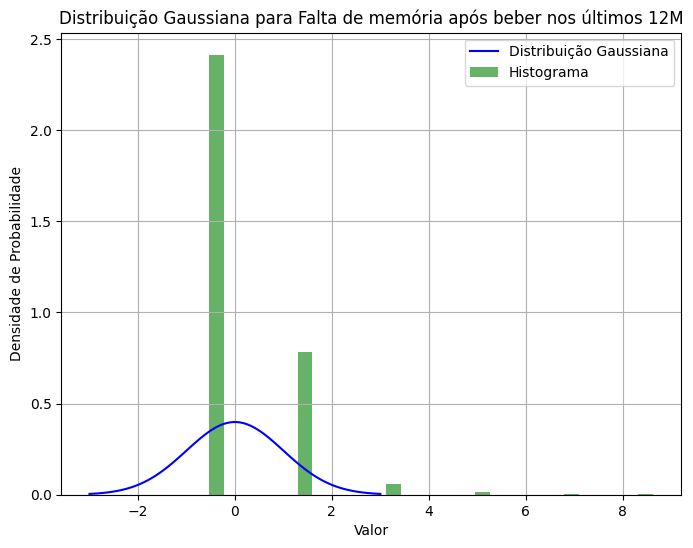

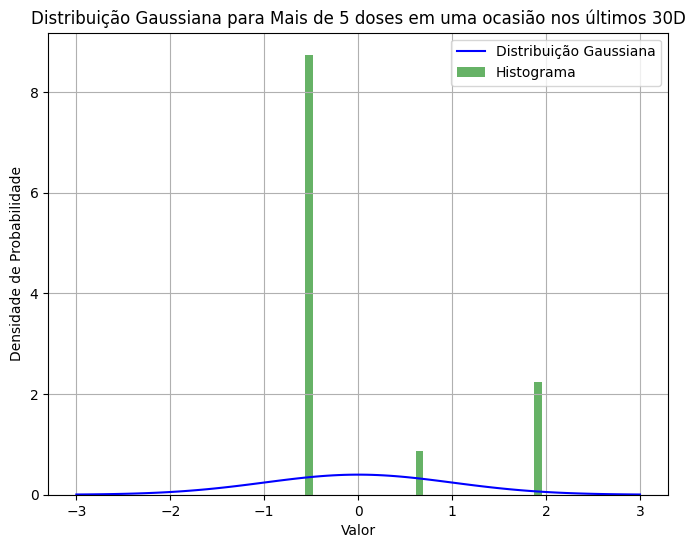

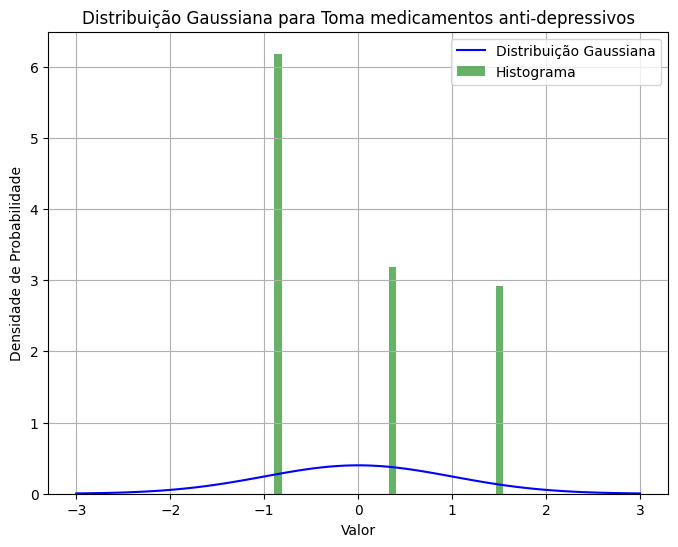

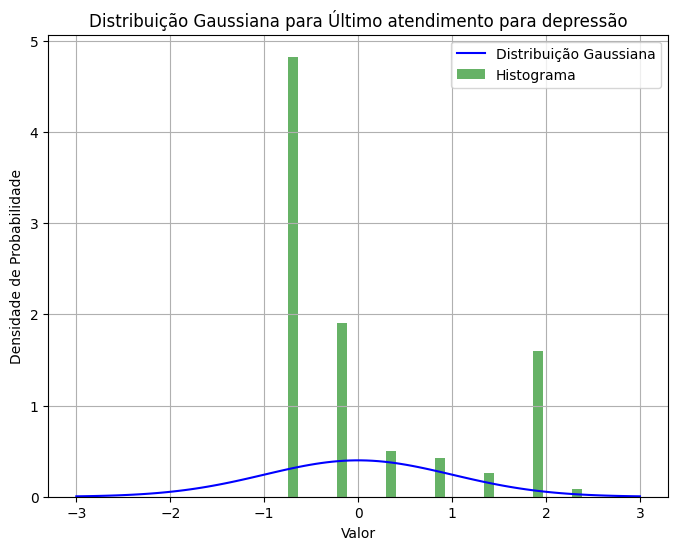

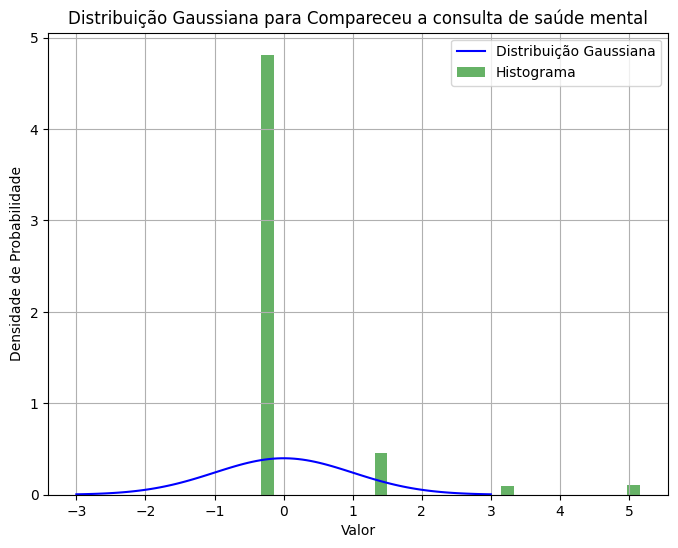

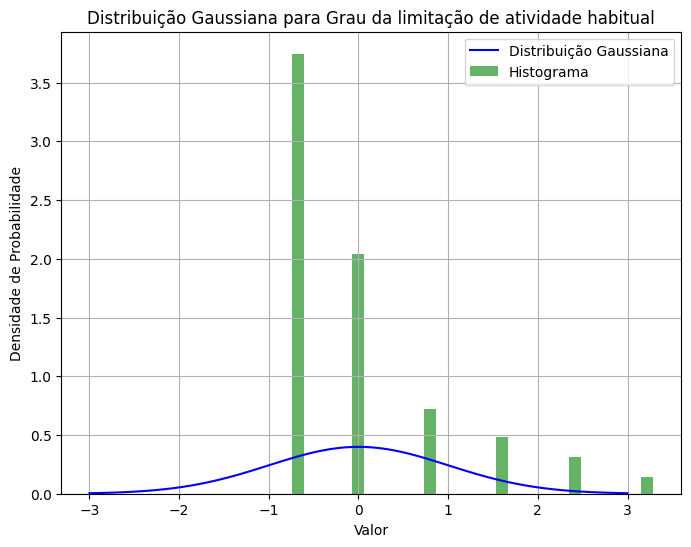

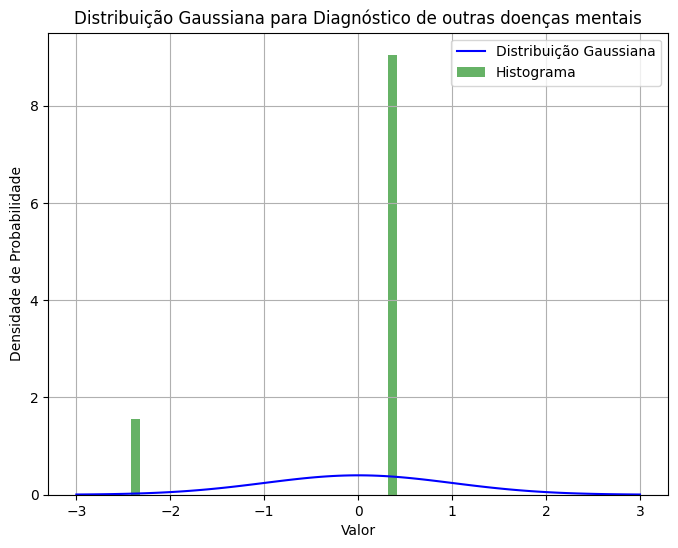

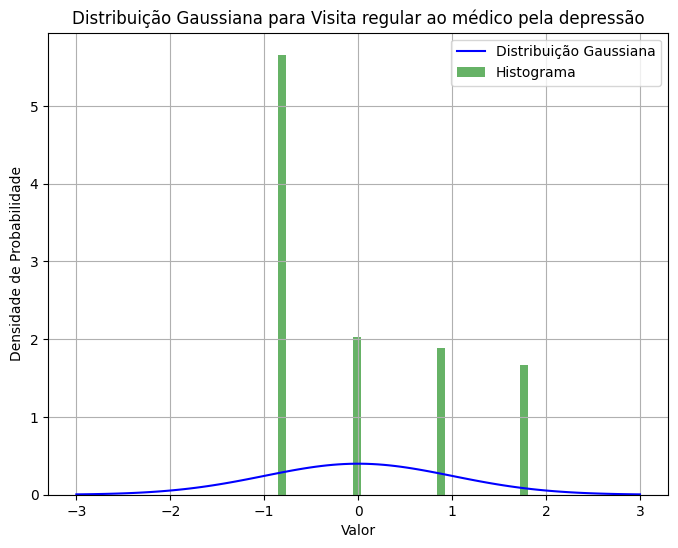

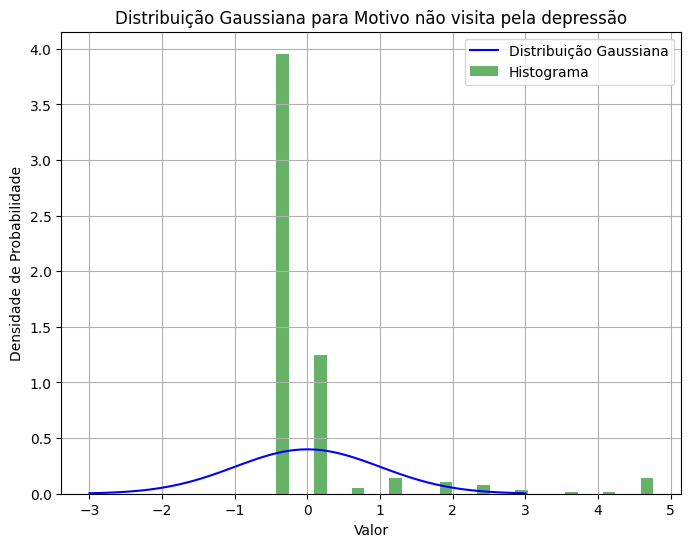

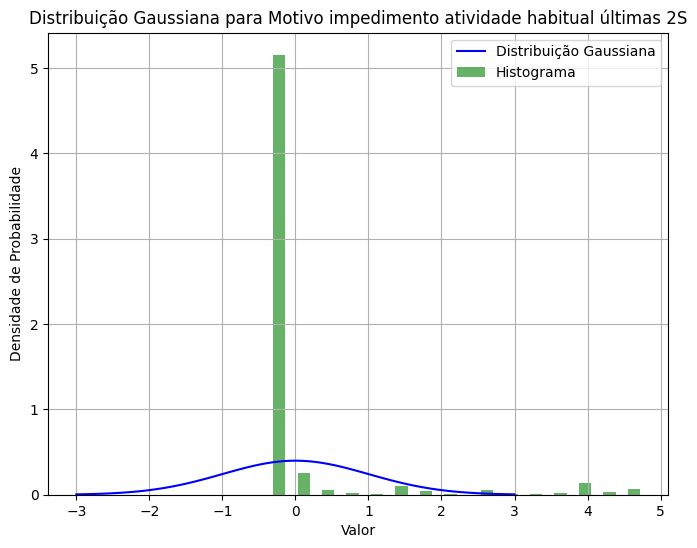

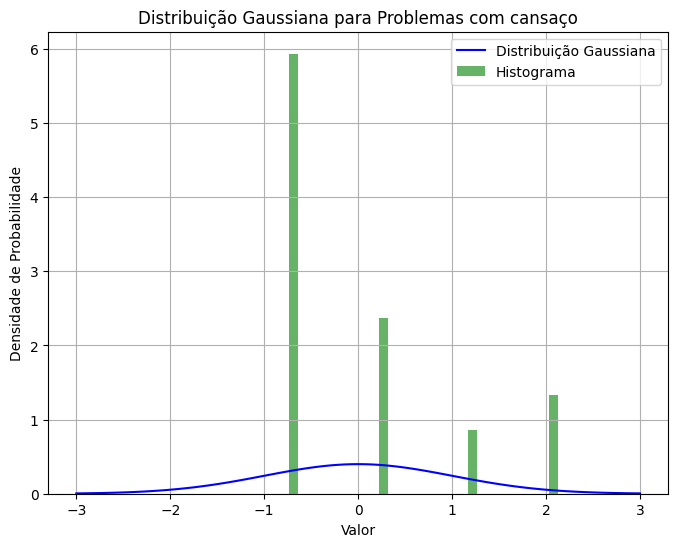

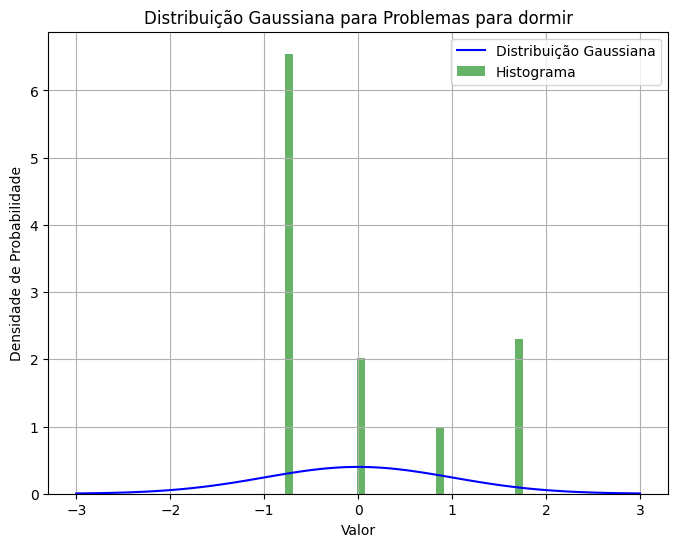

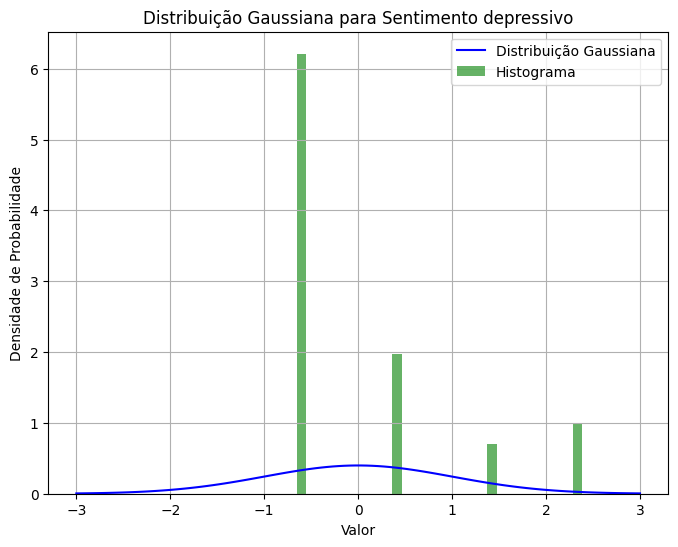

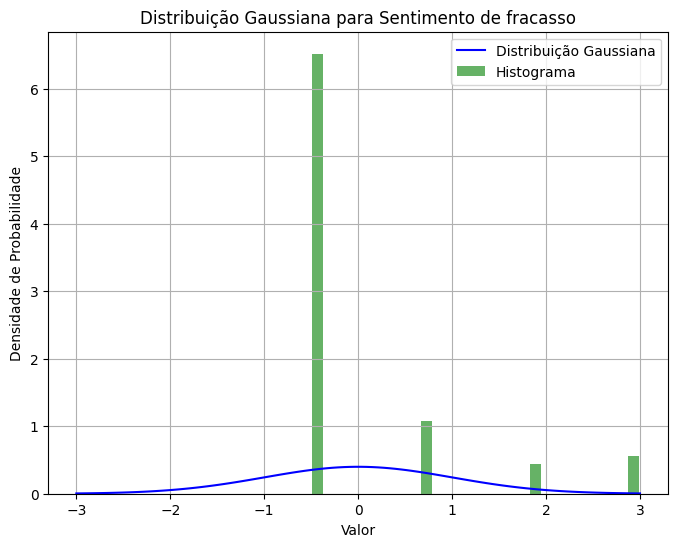

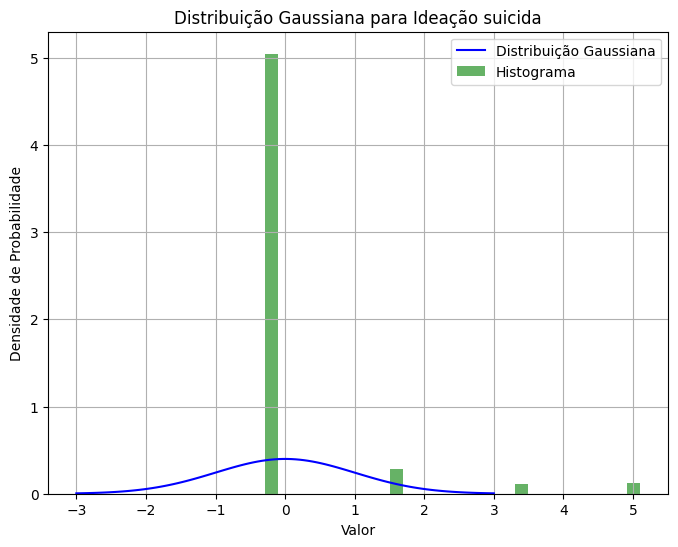

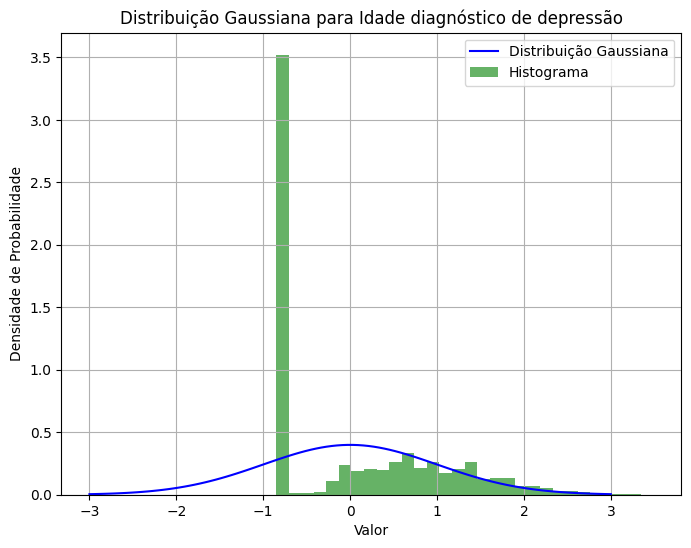

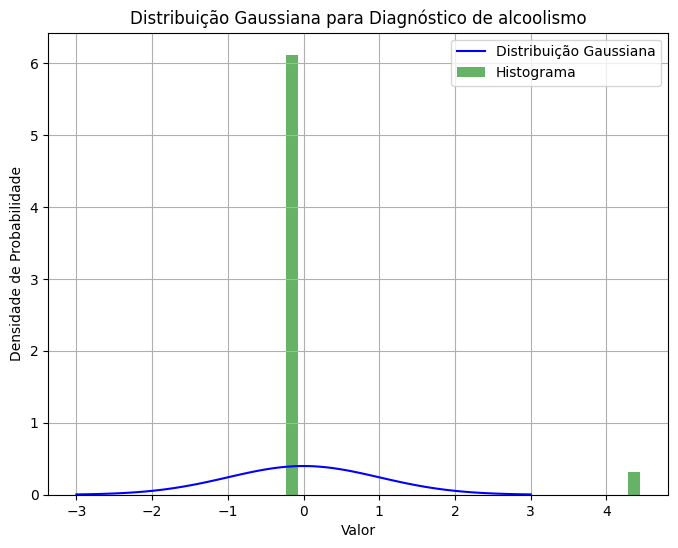

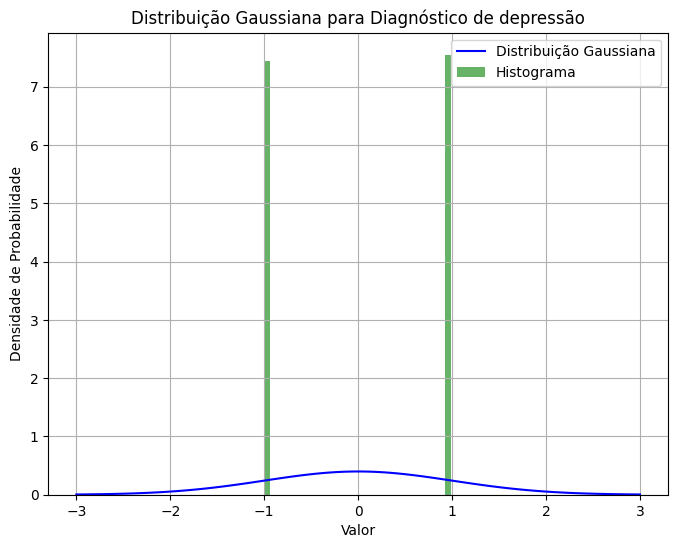

In [5]:

for coluna in defaut_df.columns:
    dados = defaut_df[coluna]
    
    # Calcular média e desvio padrão dos dados
    media = dados.mean()
    desvio_padrao = dados.std()
    
    # Gerar pontos para o gráfico da distribuição gaussiana
    x = np.linspace(media - 3*desvio_padrao, media + 3*desvio_padrao, 100)
    pdf = norm.pdf(x, loc=media, scale=desvio_padrao)
    
    # Plotar o gráfico
    plt.figure(figsize=(8, 6))
    plt.plot(x, pdf, label='Distribuição Gaussiana', color='blue')
    plt.hist(dados, bins=30, density=True, alpha=0.6, color='green', label='Histograma')
    plt.title(f'Distribuição Gaussiana para {coluna}')
    plt.xlabel('Valor')
    plt.ylabel('Densidade de Probabilidade')
    plt.legend()
    plt.grid(True)
    
    # Mostrar o gráfico
    plt.show()


In [6]:
# # Calcule a mediana de cada coluna
# median = df.median()

# # Calcule o intervalo interquartil (IQR) de cada coluna
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # Aplique a normalização robusta
# robust_normalized_df = (df - median) / IQR

# robust_normalized_df

In [7]:
seed = 101 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução
array = df.values
array

array([[11.,  2., 36., ...,  0.,  0.,  2.],
       [11.,  1., 54., ...,  0.,  0.,  2.],
       [11.,  1., 51., ...,  0.,  0.,  2.],
       ...,
       [53.,  1., 53., ..., 24.,  0.,  1.],
       [53.,  2., 55., ..., 35.,  1.,  1.],
       [53.,  1., 58., ..., 53.,  0.,  1.]])

In [8]:
X = array[:,0:len(defaut_df.columns)-1]
Y = array[:,len(defaut_df.columns)-1]

# X = array[:,0:len(defaut_df.columns)-1]
# Y = array[:,len(defaut_df.columns)-1]

# X = defaut_df
# Y = defaut_df.drop(['Diagnóstico de depressão'], axis=1)


print("X:", len(X), "Y:", len(Y))


X: 16776 Y: 16776


In [9]:
test_size = 0.2 # Tamanho do conjunto de teste
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = test_size, random_state=seed)

In [10]:
rf = RandomForestRegressor()

rf.fit(X_train, Y_train)
predict = rf.predict(X_test)
explained_variance = metrics.explained_variance_score(Y_test, predict)
mean_absolute_error = metrics.mean_absolute_error(Y_test, predict) 
mse = metrics.mean_squared_error(Y_test, predict) 
mean_squared_log_error = metrics.mean_squared_log_error(Y_test, predict)
median_absolute_error = metrics.median_absolute_error(Y_test, predict)
r2 = metrics.r2_score(Y_test, predict)

# Mostrando o resultado de desempenho do modelo
print('Ex.V: ', explained_variance)
print('MSLE: ', mean_squared_log_error)
print('R2  : ', r2)
print('MAE : ', mean_absolute_error)
print('MSE : ', mse)
print('RMSE: ', np.sqrt(mse))


Ex.V:  1.0
MSLE:  0.0
R2  :  1.0
MAE :  0.0
MSE :  0.0
RMSE:  0.0


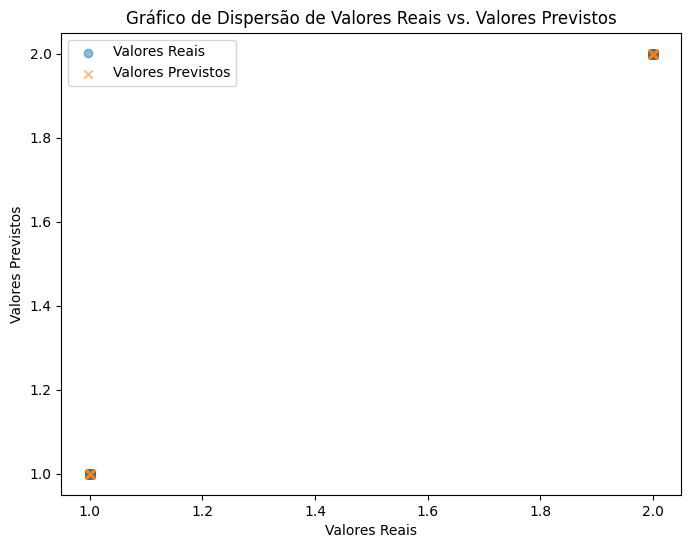

In [11]:
# Suponha que Y_test contenha os valores reais e predict contenha os valores previstos.

plt.figure(figsize=(8, 6))

# Plotagem dos valores reais com marcador 'o' (círculos)
plt.scatter(Y_test, Y_test, alpha=0.5, label='Valores Reais', marker='o')

# Plotagem dos valores previstos com marcador 'x' (cruz)
plt.scatter(Y_test, predict, alpha=0.5, label='Valores Previstos', marker='x')

plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Gráfico de Dispersão de Valores Reais vs. Valores Previstos')
plt.legend()  # Adiciona uma legenda ao gráfico

plt.show()

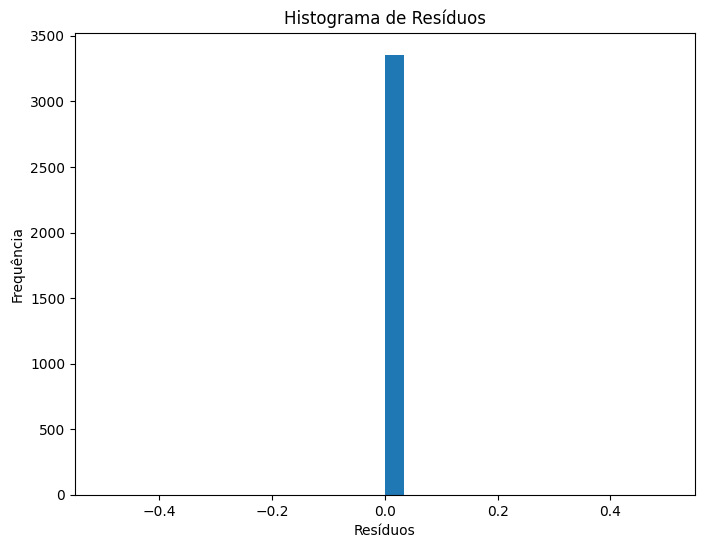

In [12]:
# Histograma de Resíduos
residuals = Y_test - predict
residuals = np.ravel(residuals)
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma de Resíduos')
plt.show()


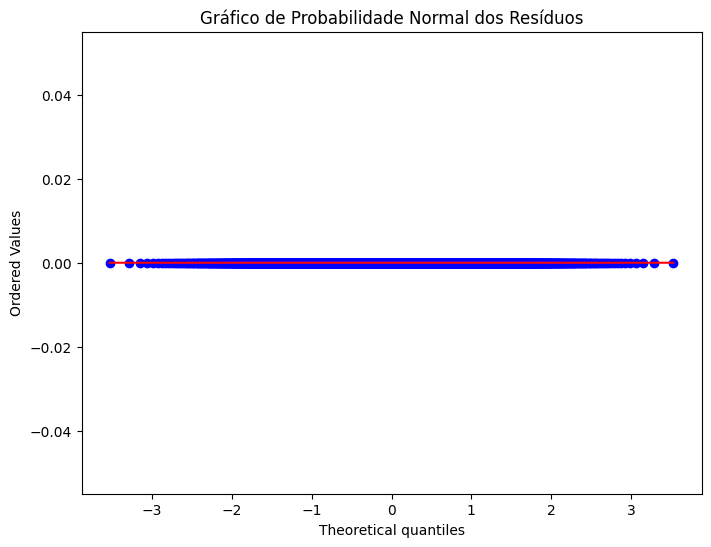

In [13]:
# Gráfico de Probabilidade Normal dos Resíduos
from scipy import stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.title('Gráfico de Probabilidade Normal dos Resíduos')
plt.show()

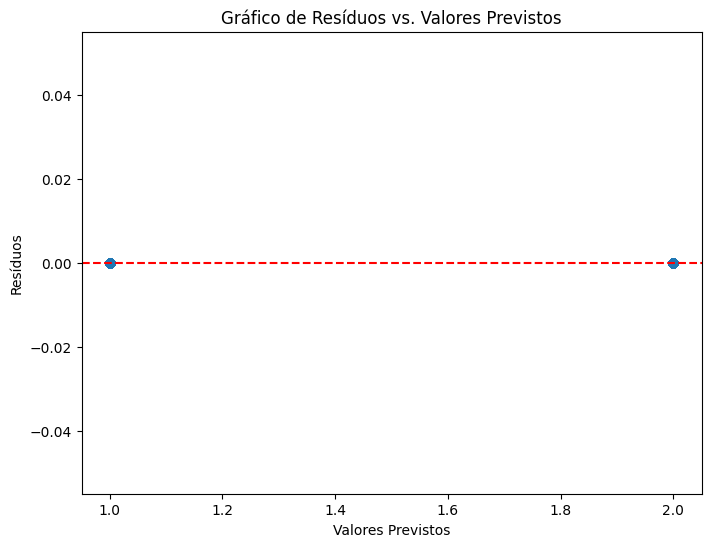

In [14]:
# Calcular os resíduos
plt.figure(figsize=(8, 6))
plt.scatter(predict, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Linha de referência dos resíduos igual a zero
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Previstos')
plt.show()

In [15]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf, X_train, Y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

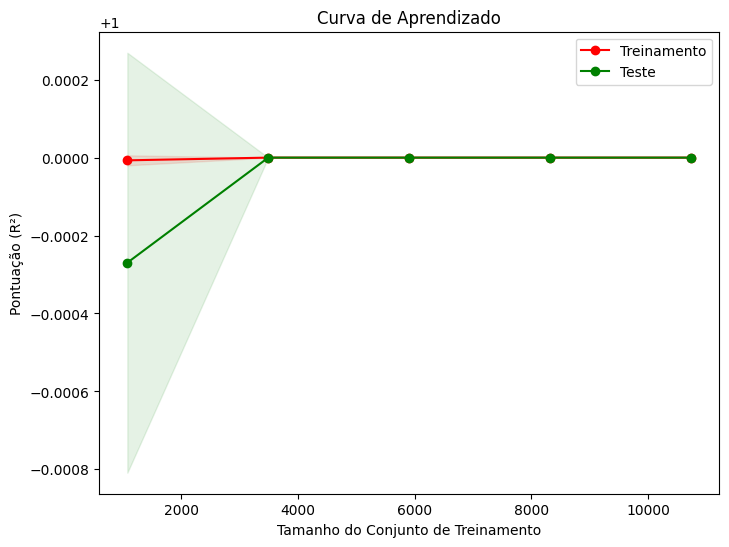

In [16]:
plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Teste")
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação (R²)')
plt.legend(loc="best")
plt.title('Curva de Aprendizado')
plt.show()